## Chapter 05. 统计学

### 5.1 描述单个数据集
凭借口碑与运气，DataSciencester已经发展了数十名成员。这时，融资部门的副总来问你要一些关于你的成员有多少朋友的描述，以此来确定他潜在的电梯演说对象。

运用第1章中学到的技术可以很容易地生成这个数据。但你现面临的问题是如何描述它。

先导入一些必要的包和公用函数：

In [1]:
from __future__ import division
from collections import Counter
import matplotlib.pyplot as plt
import math

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

对任何数据集，最简单的描述方法就是数据本身：

In [2]:
# 用户数
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,
               14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,
               10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,
               8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1]

我们通过Couner和plt.bar()把你的朋友数绘成直方图：

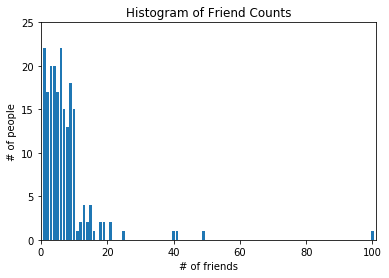

In [3]:
##### 5.1 绘制朋友数的直方图
def make_friend_counts_histogram():
    friend_counts = Counter(num_friends)
    # print("friend count=", friend_counts)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()
    
make_friend_counts_histogram()

In [4]:
num_points = len(num_friends)
num_points

204

In [5]:
largest_value = max(num_friends)
largest_value

100

In [6]:
smallest_value = min(num_friends)
smallest_value

1

#### 5.1.1 中心倾向
我们常常希望了解数据中心位置的一些概念。 一个常用的方法是使用均值（mean或average），即用数据和除以数据个数：

In [7]:
# 如果没有从__future__导入division，那就是不对的 
def mean(x): 
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

我们常常也会用到中位数（median），它是指数据中间点的值（如果数据点的个数是奇数），或者中间两个点的平均值（如果数据点的个数是偶数）:

In [8]:
# 计算中位数
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

均值对数据中的异常值非常敏感。如果最具人缘的用户有200个朋友（不是100），均值会上升至7.82，而中位数不变。如果异常值属于不良数据，那么均值会误导我们。举一个老生常谈的例子，20世纪80年代，北卡罗来纳大学起薪最高的专业是地理学，因为球星迈克尔·乔丹曾就读于此，均值计算就包含了这个“异常值”。

中位数的一个泛化概念是分位数（quantile），它表示少于数据中特定百分比的一个值。（中位数表示少于50%的数据的一个值)

In [9]:
# 计算分位数
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("quantile of 0.10    =", quantile(num_friends, 0.10))
print("quantile of 0.25    =", quantile(num_friends, 0.25))
print("quantile of 0.75    =", quantile(num_friends, 0.75))
print("quantile of 0.90    =", quantile(num_friends, 0.90))

quantile of 0.10    = 1
quantile of 0.25    = 3
quantile of 0.75    = 9
quantile of 0.90    = 13


还有一个不太常用的概念众数（mode），它是指出现次数最多的一个或多个数：

In [10]:
# 计算众数
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[1, 6]

#### 5.1.2 离散度
离散度是数据的离散程度的一种度量。通常，如果它所统计的值接近零，则表示数据聚集在一起，离散程度很小，如果值很大（无论那意味着什么），则表示数据的离散度很大。例如，一个简单的度量是极差（range），指最大元素与最小元素的差：

In [11]:
# 计算极差
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

离散度的另一个更复杂的度量是方差（variance）。这个概念看起来似乎是各个数值分别与其均值之差的平方的均值，但我们除以的是$n-1$而不是$n$（除以$n-1$和相关性有关，参考《深入浅出统计学》）。方差的计算公式：
${\delta}^2 = \frac{1}{n}\sum_{i=1}^{n}{(x-\bar{x})^2}$

In [12]:
# 计算方差
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def sum_of_squares(v):
    return sum(v_i * v_i for v_i, v_i in zip(v, v))

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    x_bar = mean(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

现在，无论我们的数据是什么单位（即“朋友”），所有中心倾向的度量都是同一单位。极差的单位也与此相同。但是，方差的单位是原数据单位的平方（即“平方朋友”）。然而，用方差很难给出直观的比较，所以我们更常使用标准差（standard deviation），即方差的平方根:

In [13]:
# 计算标准差
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

极差和标准差也都有我们之前提到的均值计算常遇到的异常值问题。再看之前的例子，如果我们最具人缘的用户有200个朋友，标准差就变为14.89，增加了60%！

一种更加稳健的方案是计算75%的分位数和25%的分位数之差：

In [14]:
# 分位数之差
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

### 5.2 相关
DataSciencester战略发展部的副总持有这样一种想法，即用户在某个网站上花费的时间与其在这个网站上拥有的朋友数相关（他并不是一个无所事事的领导）。现在，他要求你来验证这个想法。

通过分析研究流量日志，你设法做出了一个daily_minutes列表，这个列表描述了每个用户每天在DataSciencester花费了多长时间。你还对这个列表排了序，使它的元素和你之前的列表num_friends的元素对应了起来，以便进一步研究两个度量之间的关系:

In [15]:
# 对应于用户数，每个用户每天逗留在社交网站的时长
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,
                 34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,
                 46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                 36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,
                 21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,
                 26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,
                 30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,
                 24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,
                 39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,
                 35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,
                 20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,
                 33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,
                 14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,
                 29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,
                 35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,
                 33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,
                 21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

我们先来看一下协方差（covariance），这个概念是方差的一个对应词。方差衡量了单个变量对均值的偏离程度，而协方差衡量了两个变量对均值的串联偏离程度：

In [16]:
# 计算协方差
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

> 关于协方差参考https://www.zhihu.com/question/20852004

回想一下点乘（dot）的概念，它意味着对应的元素对相乘后再求和。如果向量x和向量y的对应元素同时大于它们自身序列的均值，或者同时小于它们自身序列的均值，那将为求和贡献一个正值。如果其中一个元素大于自身的均值，而另一个小于自身的均值，那将为求和贡献一个负值。因此，如果协方差是一个大的正数，就意味着如果y很大，那么x也很大，或者如果y很小，那么x也很小。如果协方差为负而且绝对值很大，就意味着x和y一个很大，而另一个很小。接近零的协方差意味着以上关系都不存在。

这个数字很难解释，原因如下。
- 它的单位是输入单位的乘积（即朋友-分钟-每天），难于理解。（“朋友 - 分钟 - 每天” 是什么鬼？）
- 如果每个用户的朋友数增加到两倍（但分钟数不变），方差会增加至两倍。但从某种意义上讲，变量的相关度是一样的。换句话讲，很难说“大”的协方差意味着什么

因此，相关是更常受到重视的概念，它是由协方差除以两个变量的标准差。相关系数没有单位，它的取值在-1（完全反相关）和1（完全相关）之间。 相关值0.25代表一个相对较弱的正相关：

In [17]:
# 计算相关性
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
correlation(num_friends, daily_minutes)

0.24736957366478218

但是，我们忽略了对数据的检查。看下图，那个有100个朋友的用户（每天只在网上花费1分钟）是一个明显的异常值，相关系数的计算对异常值非常敏感：
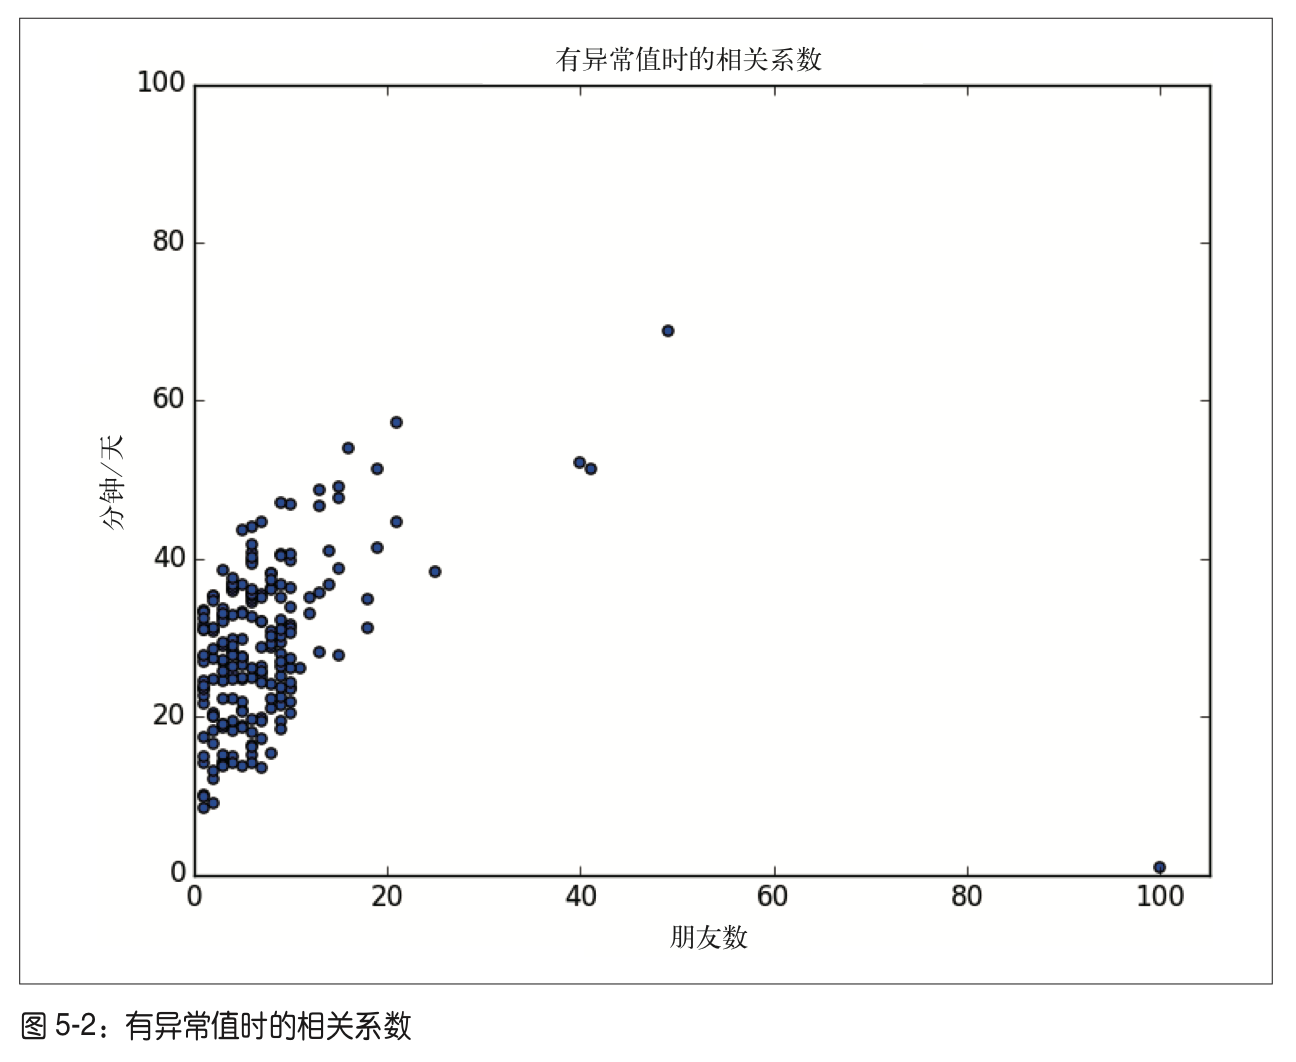

In [18]:
outlier = num_friends.index(100) # outlier的索引 
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier] 
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier] 
correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

### 5.3 辛普森悖论
辛普森悖论是指分析数据时可能会发生的意外。具体而言，如果忽略了混杂变量，相关系数会有误导性。

例如，假设你先将所有会员分成东海岸数据科学家和西海岸数据科学家两类，然后决定验证一下哪一边海岸的数据科学家更友好：
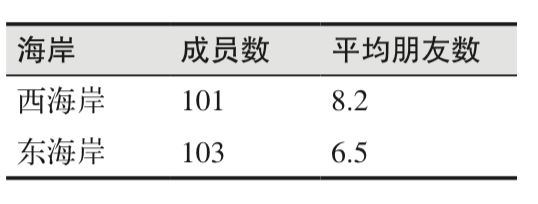

很明显，西海岸的数据科学家比东海岸的数据科学家更招人喜欢。你的同事还可以给出许多理由解释这个结果：或许是阳光、咖啡、有机农产品，又或许是旖旎的太平洋风光。

但分析数据时，你却发现了一些奇怪的结论。如果你仅仅比较拥有博士学位的数据科学家，结论表明东海岸数据科学家的平均朋友数更多。如果再仅仅比较没有博士学位的数据科学家，结论仍然是东海岸的数据科学家平均拥有更多的朋友！
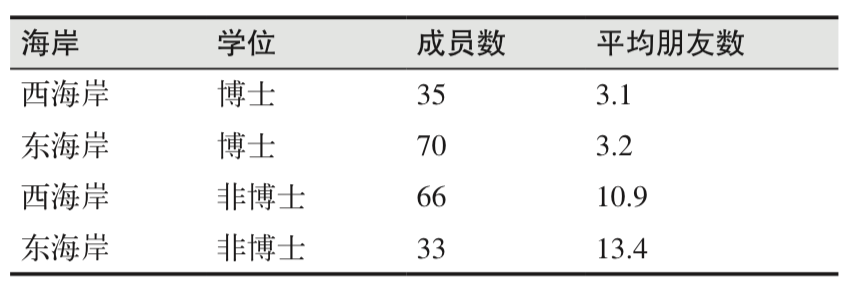

一旦你考虑了用户的学位，得出的相关系数就会发生变化！将东海岸科学家的数据和西海岸科学家的数据混同起来，会掩盖一件事实，即东海岸数据科学家更偏向博士类型。

这种现象在现实世界中时有发生。关键点在于，相关系数假设在其他条件都相同的前提之下衡量两个变量的关系。而当数据类型变成随机分配，就像置身于精心设计的实验之中时，“其他条件都相同”也许还不是一个糟糕的前提假设。但如果存在另一种类型分配的更深的机制，“其他条件都相同”可能会成为一个糟糕的前提假设。

避免这种窘境的唯一务实的做法是充分了解你的数据，并且尽可能核查所有可能的混杂因素。显然，这不可能万无一失。如果你没有这200个数据科学家的受教育程度的数据，你很可能就已经得出了西海岸的数据科学家天生更有社交能力的结论。

### 5.4 相关系数其他注意事项
相关系数为零表示两个变量之间不存在线性关系。但它们之间还可能会存在其他形式的关系。例如，如果： 

x = [-2, -1, 0, 1, 2]  
y = [ 2, 1, 0, 1, 2] 

那么， x和y的相关系数为0。但容易看出，x和y之间显然具有某种关系，y中的每个元素等于x中相应元素的绝对值。

### 5.5 相关和因果
你很可能听说过这样一句话：“相关不是因果。”这样的说辞大致出自一位遇到了一堆威胁着他不可动摇的世界观的数据的人之口。然而，这是个重要的论断——如果x和y强相关，那么意味着可能x引起了y，或y引起了x，或者两者相互引起了对方，或者存在第三方因素同时引起了x和y，或者什么都不是。

回想一下 num_friends 和 daily_minutes 之间的关系。如果DataSciencester用户在网站上拥有更多的朋友，可能会引起一个结果，即这些用户可能就会愿意在网上花费更多的时间。也可能是这种情形：如果每个朋友每天发布一定数量的内容，那么用户的朋友越多，就需要越多的时间来浏览朋友们的更新。

但是，也有这样一种可能。你泡在 DataSciencester 论坛上的时间越长，你就越有可能碰上和结识志同道合的朋友。这也意味着，在网站上花费时间越多，就会拥有更多朋友。

第三种可能是，越是那些热衷于数据科学的用户，就越喜欢在网上花更多时间（因为他们发现这更有趣），并且更乐于结交数据科学家朋友（因为他们对其他人不感冒）。

进行随机试验是证实因果关系的可靠性的一个好方法。你可以先将一组具有类似的统计数据的用户随机分为两组，再对其中一组施加稍微不同的影响因素，然后你会发现，不同的因素会导致不同的结果。